In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import nltk as nlp
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
#nltk.download()
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer

from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,ImageColorGenerator

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv


In [11]:
train = pd.read_csv("../input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv")

In [12]:
train.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [13]:
train.tail()

,Review,Rating
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1
20490,"people talking, ca n't believe excellent ratin...",2


In [14]:
train.shape

(20491, 2)

In [15]:
train.dtypes

Review    object
Rating     int64
dtype: object

In [16]:
cat = train.select_dtypes("object")
cat.dtypes

Review    object
dtype: object

In [17]:
cat_data = cat.astype("category")

In [18]:
cat_data.dtypes

Review    category
dtype: object

In [19]:
train.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [20]:
corr_df = train.corr()
corr_df

,Rating
Rating,1.0


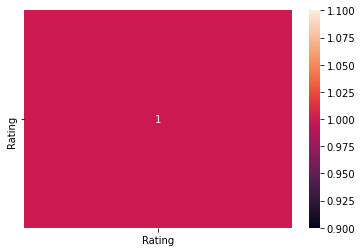

In [21]:
sns.heatmap(corr_df , annot = True)
plt.show()

In [22]:
train.isnull().sum().sort_values(ascending = False)

Rating    0
Review    0
dtype: int64

In [23]:
train.isnull().sum()

Review    0
Rating    0
dtype: int64

In [24]:
len(train['Rating'].value_counts())

5

In [25]:
train.rename(columns={"Review" :"review","Rating" :"rating" }, inplace = True)

In [26]:
review_list=[]
for review in train.review:
    review=re.sub("[^a-zA-Z]"," ",review)
    review=review.lower()
    review=nltk.word_tokenize(review)
    lemma  = nlp.WordNetLemmatizer()
    review=[lemma.lemmatize(word) for word in review]
    review=" ".join(review)
    review_list.append(review)

In [27]:
max_features =250
count_vectorizer =CountVectorizer(max_features=max_features,stop_words="english")
sparce_matrix = count_vectorizer.fit_transform(review_list).toarray()
print("The 150 most commonly used {} words: {} ".format(max_features,count_vectorizer.get_feature_names()))

The 150 most commonly used 250 words: ['able', 'access', 'air', 'airport', 'amazing', 'area', 'arrived', 'ask', 'asked', 'available', 'away', 'bad', 'bar', 'bathroom', 'beach', 'beautiful', 'bed', 'best', 'better', 'big', 'bit', 'block', 'book', 'booked', 'breakfast', 'buffet', 'building', 'bus', 'business', 'ca', 'called', 'came', 'cana', 'car', 'central', 'chair', 'check', 'choice', 'city', 'clean', 'close', 'club', 'coffee', 'come', 'comfortable', 'couple', 'day', 'deal', 'definitely', 'desk', 'did', 'different', 'dinner', 'distance', 'doe', 'door', 'drink', 'early', 'easy', 'eat', 'end', 'english', 'enjoy', 'enjoyed', 'especially', 'euro', 'evening', 'excellent', 'expect', 'expensive', 'experience', 'extra', 'extremely', 'family', 'fantastic', 'far', 'feel', 'felt', 'fine', 'floor', 'food', 'free', 'fresh', 'friend', 'friendly', 'fun', 'getting', 'given', 'going', 'good', 'got', 'great', 'ground', 'guest', 'happy', 'hard', 'having', 'help', 'helpful', 'high', 'highly', 'holiday', '

In [28]:
df_review_list = pd.DataFrame(review_list, columns = ['review'])

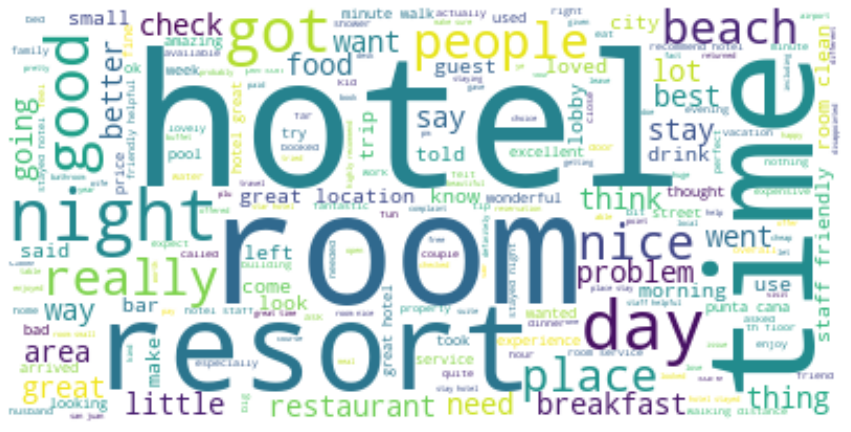

In [29]:
text = " ".join(str(each) for each in df_review_list.review)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=250, background_color="white").generate(text)
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
punctuations = """!()-![]{};:,+'"\,<>./?@#$%^&*_~Â""" 


def reviewParse(review):
    splitReview = review.split() 
    parsedReview = "".join([word.translate(str.maketrans('', '', punctuations)) + " " for word in splitReview]) 
    return parsedReview 

train["CleanReview"] = train["review"].apply(reviewParse) 
train.head() 

,review,rating,CleanReview
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4 experience hotel monaco seatt...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...


In [31]:
review = train["CleanReview"].copy() 


print("Example Sentence: ") 
print(review[26])

token = Tokenizer() 
token.fit_on_texts(review) 
texts = token.texts_to_sequences(review) 


print("Into a Sequence: ")
print(texts[26])

texts = pad_sequences(texts, padding='post') 


print("After Padding: ")
print(texts[26])

Example Sentence: 
loved stayed warwick overnight getway enjoy christmas shopping warwick exceeded expectations staff wonderful extrememly friendly room clean service lounge wonderful came contact hotel friendly women bathroom lever lounge well think haunted totally creepy vibe lights anywho really enjoyed stay going couple days 
Into a Sequence: 
[82, 15, 6277, 1614, 18133, 253, 1159, 180, 6277, 1541, 595, 7, 61, 7039, 30, 2, 20, 16, 268, 61, 184, 1175, 1, 30, 1224, 42, 15674, 268, 9701, 91, 11722, 732, 5378, 3328, 1077, 22270, 26, 123, 8, 83, 151, 78]
After Padding: 
[  82   15 6277 ...    0    0    0]


In [32]:
def encodeLabel(label):
    if label == 5 or label == 4: 
        return 2 
    if label == 3: 
        return 1 
    return 0 

labels = ["Negative", "Neutral", "Positive"] 
train["EncodedRating"] = train["rating"].apply(encodeLabel) 
train.head() 

,review,rating,CleanReview,EncodedRating
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,2
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,0
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4 experience hotel monaco seatt...,1
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,2
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,2


In [39]:
X_train, X_test, y_train, y_test = train_test_split(texts, train["EncodedRating"], test_size = 0.25, random_state = 0)

In [42]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [45]:
y_pred = classifier.predict(X_test)

In [46]:
cm = confusion_matrix(y_test, y_pred)

In [49]:
print(cm)

[[  35    6  741]
 [  22    9  554]
 [ 117   25 3614]]


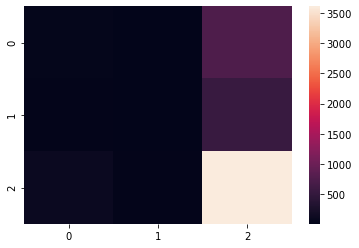

In [51]:

seaborn.heatmap(cm)
plt.show()

In [52]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.22      0.03      0.06       782
           1       0.20      0.02      0.03       585
           2       0.74      0.97      0.84      3756

    accuracy                           0.72      5123
   macro avg       0.39      0.34      0.31      5123
weighted avg       0.60      0.72      0.63      5123



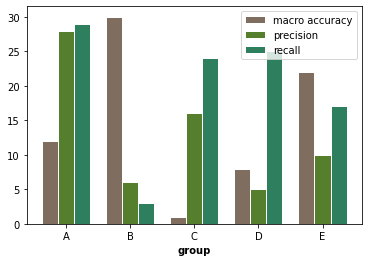

In [54]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='macro accuracy')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='precision')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='recall')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()